In [1]:
import importlib
import pyspectral.dataset as pyd
from pathlib import Path
import numpy as np
import pyspectral.modeling.train as pyt
import pyspectral.features as pyf
from pyspectral.config import DATA_DIR
csv_path = DATA_DIR / "annotations_S80.csv"
#importlib.reload(pyt)
#importlib.reload(pyd)

In [2]:
spectra, arts = pyd.SpectraPair.from_annotations(csv_path, DATA_DIR)
spectra.eval(2)

100%|███████████████████████████████████████████████████████████████████████████████| 4/4 [04:59<00:00, 74.98s/it]

OOF RMSE (standardized space): 55.699657
Diagonal affine OOF RMSE (std):  0.459281
Diagonal affine OOF RMSE (orig): 0.420689
OOF RMSE (original units):    58.144135
---------------------------


In [3]:
oof_stats=pyt.cv_train_model(spectra, arts, groups=True, epochs=5, n_splits=4) 
print(oof_stats)
print("---------------------------")

Identity RMSE: 0.370063
Diagonal affine RMSE (oof): 0.551697
PCR(32) RMSE (oof): 0.585074


100%|███████████████████████████████████████████████████████████████████████████████| 2/2 [00:16<00:00,  8.37s/it]

MultiTaskElasticNet RMSE (oof): 0.393162


In [4]:
import pyspectral.modeling.predict as pyp
#importlib.reload(pyp)
plot_data = pyp.predict_cube(0, oof_stats, DATA_DIR, csv_path)

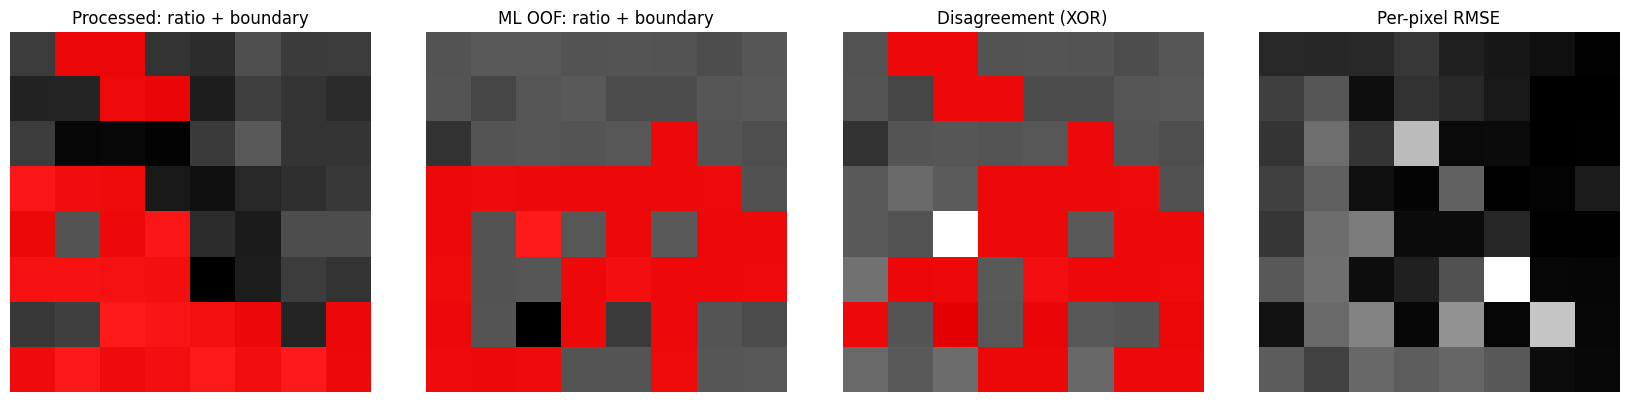

{}

In [5]:
import pyspectral.plots as plots
#importlib.reload(plots)
plots.compare_boundaries(plot_data, up=False)